In [1]:
#-*- coding:utf-8 -*-#代码基于python2版本，请用python2执行#输入scode时，请加引号，如‘600600’#输入year时，请直接输入，如 2017

import tushare as ts
import matplotlib.pyplot as plt
import numpy as np


def Asset_And_Equity(scode):

    scode = scode
    stock_basics = ts.get_stock_basics()
    stock__basics = stock_basics[stock_basics.index == scode]
        
    name = str(stock__basics.name[stock__basics.index == scode])
    industry = str(stock__basics.industry[stock__basics.index == scode])
    area = str(stock__basics.area[stock__basics.index == scode])
    pe = float(stock__basics.pe[stock__basics.index == scode])
    pb = float(stock__basics.pb[stock__basics.index == scode])

    liquidasset = float(stock__basics.liquidAssets[stock__basics.index == scode])
    fixedasset = float(stock__basics.fixedAssets[stock__basics.index == scode])
    totalasset = float(stock__basics.totalAssets[stock__basics.index == scode])

    outstanding = float(stock__basics.outstanding[stock__basics.index == scode])
    totals = float(stock__basics.totals[stock__basics.index == scode])

    esp = float(stock__basics.esp[stock__basics.index == scode])
    bvps = float(stock__basics.bvps[stock__basics.index == scode])
    reservedpershare = float(stock__basics.reservedPerShare[stock__basics.index == scode])
    perundp = float(stock__basics.perundp[stock__basics.index == scode])

    plt.figure(figsize=(12,6))

    #资产状况饼图
    plt.subplot(131)
    labels_asset = 'liquid asset','fixed asset'
    sizes_asset = liquidasset, fixedasset
    colors_asset = 'yellowgreen', 'gold'
    plt.axis('equal')
    plt.pie(sizes_asset, explode=None,labels=labels_asset,colors=colors_asset,autopct='%1.1f%%',shadow=True,startangle=50)
    plt.title('Asset situation')

    col_labels = ['liquid(wanyuan)', 'fixed(wanyuan)','outstanding(yigu)', 'totals(yigu)']
    row_labels = ['%s'%scode]
    table_vals = [[liquidasset,fixedasset,outstanding,totals]]
    my_table = plt.table(cellText=table_vals,colWidths=[0.4]*4,\
                         rowLabels=row_labels,colLabels=col_labels
                         )

    #股本状况饼图
    plt.subplot(132)
    labels_share = 'outstanding', 'totals'
    sizes_share = outstanding, totals
    colors_share = 'yellowgreen', 'gold'
    plt.axis('equal')
    plt.pie(sizes_share, explode=None, labels=labels_share,colors=colors_share,autopct='%1.1f%%',shadow=True,startangle=50)
    plt.title('Equity situation')


    #每股净资，每股未分配利润
    plt.subplot(133)
    ind = np.arange(2)
    numlist = [bvps,perundp]
    plt.bar(ind, numlist)
    plt.xlabel('DATA PS')
    plt.ylabel('YUAN')
    plt.title('NA&UNDNI PS')
    plt.xticks(ind, ('NAPS', 'UNDNIPS'))
    for a, b in zip(ind, numlist):
        plt.text(a, b+0.05, '%.2f'%b, ha='center', va='bottom', fontsize=7)

        
    plt.show()
    
    return stock_basics

In [2]:
def get_profit_data(year1, year2, year3, year4, year5, scode):

    timelist = []
    timelist.append(year1)
    timelist.append(year2)
    timelist.append(year3)
    timelist.append(year4)
    timelist.append(year5)

    
    roe = []
    net_profit_ratio = []
    gross_profit_rate = []
    net_profits = []
    eps = []
    business_income = []
    bips = []

    for i in timelist:
    
        profit_data = ts.get_profit_data(i,4)
        profit_data.index = profit_data.code
        data = profit_data[profit_data.index == scode]
        
        roe.append(float(data.roe))
        net_profit_ratio.append(float(data.net_profit_ratio))
        gross_profit_rate.append(float(data.gross_profit_rate))
        net_profits.append(float(data.net_profits))
        eps.append(float(data.eps))
        business_income.append(float(data.business_income))
        bips.append(float(data.bips))
        
    plt.figure(figsize=(12,6))

    #营业收入柱状图
    plt.subplot(231)
    ind = np.arange(5)
    plt.bar(ind, business_income, color='yellowgreen')
    plt.title('Business Income(BaiWan Yuan)')
    plt.xticks(ind, (year1, year2, year3, year4, year5))
    for a, b in zip(ind, business_income):
        plt.text(a, b+0.05, '%.2f'%b, ha='center', va='bottom', fontsize=7)

    #净利润柱状图
    plt.subplot(232)
    plt.bar(ind, net_profits, color='gold')
    plt.title('Net_profits(Wan Yuan)')
    plt.xticks(ind, (year1, year2, year3, year4, year5))
    for a, b in zip(ind, net_profits):
        plt.text(a, b+0.05, '%.2f'%b, ha='center', va='bottom', fontsize=7)

    #每股收益柱状图
    plt.subplot(233)
    plt.bar(ind, eps, color='#FFA500')
    plt.title('EPS')
    plt.xticks(ind, (year1, year2, year3, year4, year5))
    for a, b in zip(ind, eps):
        plt.text(a, b+0.05, '%.2f'%b, ha='center', va='bottom', fontsize=7)

    #roe折线图
    plt.subplot(234)
    plt.title('ROE(%)')
    plt.plot(roe, 'r', label='ROE')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    #净利润率折线图
    plt.subplot(235)
    plt.title('Net_Profit_Ratio(%)')
    plt.plot(net_profit_ratio, 'b', label='Net_Profit_Ratio')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    #毛利率折线图
    plt.subplot(236)
    plt.title('Gross_Profit_Rate(%)')
    plt.plot(gross_profit_rate, 'g', label='Gross_Profit_Ratio')
    plt.xticks(ind, (year1, year2, year3, year4, year5))


    plt.show()

In [3]:
def get_operation_data(year1, year2, year3, year4, year5, scode):

    timelist = []
    timelist.append(year1)
    timelist.append(year2)
    timelist.append(year3)
    timelist.append(year4)
    timelist.append(year5)

    arturnover = []
    arturndays = []
    inventory_turnover = []
    inventory_days = []
    currentasset_turnover = []
    currentasset_days = []


    for i in timelist:
        
        operation_data = ts.get_operation_data(i,4)
        operation_data.index = operation_data.code
        data = operation_data[operation_data.index == scode]
        
        arturnover.append(float(data.arturnover))
        arturndays.append(float(data.arturndays))
        inventory_turnover.append(float(data.inventory_turnover))
        inventory_days.append(float(data.inventory_days))
        currentasset_turnover.append(float(data.currentasset_turnover))
        currentasset_days.append(float(data.currentasset_days))
     


    plt.figure(figsize=(12,6))
    ind = np.arange(5)

    #应收账款折线图
    plt.subplot(231)
    plt.title('AR Turnover(ci)')
    plt.plot(arturnover, 'r', label='AR Turnover')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    #存货折线图
    plt.subplot(232)
    plt.title('Inventory Turnover(ci)')
    plt.plot(inventory_turnover, 'b', label='Inventory Turnover')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    #流动资产折线图
    plt.subplot(233)
    plt.title('CA Turnover(ci)')
    plt.plot(currentasset_turnover, 'g', label='CA Turnover')
    plt.xticks(ind, (year1, year2, year3, year4, year5))


    #应收账款柱状图
    plt.subplot(234)
    plt.bar(ind, arturndays, color='yellowgreen')
    plt.title('AR Turnover Days')
    plt.xticks(ind, (year1, year2, year3, year4, year5))
    for a, b in zip(ind, arturndays):
        plt.text(a, b+0.05, '%.2f'%b, ha='center', va='bottom', fontsize=7)

    #存货柱状图
    plt.subplot(235)
    plt.bar(ind, inventory_days, color='gold')
    plt.title('Inventory Turnover Days')
    plt.xticks(ind, (year1, year2, year3, year4, year5))
    for a, b in zip(ind, inventory_days):
        plt.text(a, b+0.05, '%.2f'%b, ha='center', va='bottom', fontsize=7)

    #流动资产柱状图
    plt.subplot(236)
    plt.bar(ind, currentasset_days, color='#FFA500')
    plt.title('CA Turnover Days')
    plt.xticks(ind, (year1, year2, year3, year4, year5))
    for a, b in zip(ind, currentasset_days):
        plt.text(a, b+0.05, '%.2f'%b, ha='center', va='bottom', fontsize=7)


    plt.show()

In [4]:
def get_growth_data(year1, year2, year3, year4, year5, scode):
        
    timelist = []
    timelist.append(year1)
    timelist.append(year2)
    timelist.append(year3)
    timelist.append(year4)
    timelist.append(year5)

    mbrg = []
    nprg = []
    nav = []
    targ = []
    eps = []
    epsg = []
    seg = []

    for i in timelist:
        
        growth_data = ts.get_growth_data(i,4)
        growth_data.index = growth_data.code
        data = growth_data[growth_data.index == scode]
        
        mbrg.append(float(data.mbrg))
        nprg.append(float(data.nprg))
        nav.append(float(data.nav))
        targ.append(float(data.targ))
        epsg.append(float(data.epsg))
        seg.append(float(data.seg))

    plt.figure(figsize=(12,6))
    ind = np.arange(5)

    #收入增长率
    plt.subplot(231)
    plt.title('Income Growth(%)')
    plt.plot(mbrg, 'r', label='Income Growth')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    #净利润增长率
    plt.subplot(232)
    plt.title('NI Growth(%)')
    plt.plot(nprg, 'b', label='NI Growth')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    #净资产增长率
    plt.subplot(233)
    plt.title('NA Growth(%)')
    plt.plot(nav, 'g', label='NA Growth')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    #总资产增长率
    plt.subplot(234)
    plt.title('TA Growth(%)')
    plt.plot(targ, 'r', label='TA Growth')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    #EPS增长率
    plt.subplot(235)
    plt.title('EPS Growth(%)')
    plt.plot(epsg, 'b', label='EPS Growth')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    #股东权益增长率
    plt.subplot(236)
    plt.title('Equity Growth(%)')
    plt.plot(seg, 'g', label='seg')
    plt.xticks(ind, (year1, year2, year3, year4, year5))


    plt.show()

In [5]:
def get_debtpaying_data(year1, year2, year3, year4, year5, scode):

    timelist = []
    timelist.append(year1)
    timelist.append(year2)
    timelist.append(year3)
    timelist.append(year4)
    timelist.append(year5)

    currentratio = []         #流动比率
    quickratio = []         #速动比率
    cashratio = []          #现金比率
    icratio =[]          #利息支付倍数
    sheqratio = []         #股东权益比率
    adratio = []           #股东权益增长率


    for i in timelist:
        
        debtpaying_data = ts.get_debtpaying_data(i,4)
        debtpaying_data.index = debtpaying_data.code
        data = debtpaying_data[debtpaying_data.index == scode]
        
        currentratio.append(float(data.currentratio))
        quickratio.append(float(data.quickratio))
        cashratio.append(float(data.cashratio))
        icratio.append(float(data.icratio))
        sheqratio.append(float(data.sheqratio))
        adratio.append(float(data.adratio))
     


    plt.figure(figsize=(12,6))
    ind = np.arange(5)


    plt.subplot(231)
    plt.title('CurrentRatio')
    plt.plot(currentratio, 'r', label='CurrentRatio')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.subplot(232)
    plt.title('QuickRatio')
    plt.plot(quickratio, 'g', label='QuickRatio')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.subplot(233)
    plt.title('CashRatio')
    plt.plot(cashratio, 'b', label='CashRatio')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.subplot(234)
    plt.title('Interest Coverage Ratio')
    plt.plot(icratio, 'r', label='Interest Coverage Ratio')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.subplot(235)
    plt.title('EquityRatio')
    plt.plot(sheqratio, 'g', label='EquityRatio')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.subplot(236)
    plt.title('Equity Growth(%)')
    plt.plot(adratio, 'b', label='Equity Growth')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.show()

In [6]:
def get_cashflow_data(year1, year2, year3, year4, year5, scode):

    timelist = []
    timelist.append(year1)
    timelist.append(year2)
    timelist.append(year3)
    timelist.append(year4)
    timelist.append(year5)

    cf_sales = []         #经营现金净流量对销售收入比率
    rateofreturn = []         #资产的经营现金流量回报率
    cf_nm = []               #经营现金净流量与净利润的比率
    cf_liabilities =[]          #经营现金净流量对负债比率
    cashflowratio = []         #现金流量比率


    for i in timelist:
        
        cashflow_data = ts.get_cashflow_data(i,4)
        cashflow_data.index = cashflow_data.code
        data = cashflow_data[cashflow_data.index == scode]

        cf_sales.append(float(data.cf_sales))
        rateofreturn.append(float(data.rateofreturn))
        cf_nm.append(float(data.cf_nm))
        cf_liabilities.append(float(data.cf_liabilities))
        cashflowratio.append(float(data.cashflowratio)) 


    plt.figure(figsize=(12,6))
    ind = np.arange(5)


    plt.subplot(231)
    plt.title('OCF/Sales')
    plt.plot(cf_sales, 'r', label='OCF/Sales')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.subplot(232)
    plt.title('OCF/Asset')
    plt.plot(rateofreturn, 'g', label='OCF/Asset')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.subplot(233)
    plt.title('OCF/NI')
    plt.plot(cf_nm, 'b', label='OCF/NI')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.subplot(234)
    plt.title('OCF/Liabilities')
    plt.plot(cf_liabilities, 'r', label='OCF/Liabilities')
    plt.xticks(ind, (year1, year2, year3, year4, year5))

    plt.subplot(235)
    plt.title('CashflowRatio')
    plt.plot(cashflowratio, 'g', label='CashflowRatio')
    plt.xticks(ind, (year1, year2, year3, year4, year5))


    plt.show()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


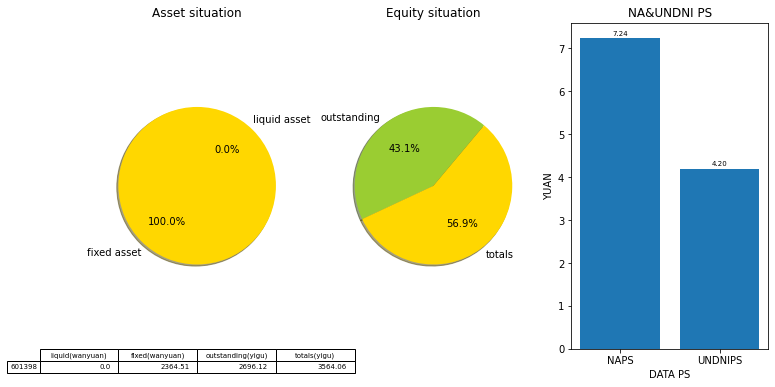

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
[Getting data:]#

OSError: 获取失败，请检查网络.

In [7]:
ab = Asset_And_Equity('601398')

In [10]:
get_cashflow_data(2020,2019,2018,2017,2016,'601398')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
[Getting data:]#

OSError: 获取失败，请检查网络.